<a href="https://colab.research.google.com/github/Loeenn/BigData/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_NN_%D0%90%D0%BD%D1%83%D1%84%D1%80%D0%B8%D0%B5%D0%B2_%D0%9B%D0%B5%D0%BC%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курсовая работа на тему 19 "Прототип сети Колмогорова–Арнольда своими руками"

##Подготовили Леманский Ю.А. и Ануфриев С.М. (ШАД-411)

## Введение

Сеть Колмогорова–Арнольда основана на теореме Колмогорова–Арнольда, которая утверждает, что любую непрерывную функцию $ f(x_1, x_2, \dots, x_n) $ от $ n $ переменных можно представить в виде суммы композиций функций от одной переменной. Это позволяет строить нейронную сеть, которая аппроксимирует произвольные функции от нескольких переменных.

Для задачи, где функция $ f(x_1, x_2) $ представлена через два признака, целевая функция может быть определена как:
$$
y = f(x_1, x_2) = \sin(x_1) + x_2 \cdot \exp(x_1 x_2) - x_1^2
$$
Целью является аппроксимация этой функции с помощью нейронной сети с одним скрытым слоем, где функции активации обучаются.

## Прямой проход

На прямом проходе вычисляется предсказание сети на основе входных данных $ X = (x_1, x_2) $.

### Скрытый слой
В скрытом слое для каждого признака $ x_1 $ и $ x_2 $ вычисляются значения функций активации $ \varphi_{1}(x_1) $ и $ \varphi_{2}(x_2) $, каждая из которых задана как обучаемая комбинация базовых функций:
$$
\varphi_1(x_1) = \alpha_1 x_1 + \beta_1 \sin(x_1) + \gamma_1 x_1^2 + \delta_1 \exp(x_1)
$$
$$
\varphi_2(x_2) = \alpha_2 x_2 + \beta_2 \sin(x_2) + \gamma_2 x_2^2 + \delta_2 \exp(x_2)
$$
где $ \alpha $, $ \beta $, $ \gamma $, и $ \delta $ — это обучаемые параметры для каждой функции активации.

### Выходной слой
Выходное значение сети $ \hat{y} $ определяется как линейная комбинация значений функций активации:
$$
\hat{y} = w_1 \varphi_1(x_1) + w_2 \varphi_2(x_2)
$$
где $ w_1 $ и $ w_2 $ — обучаемые веса, которые контролируют вклад каждой функции активации.

## Обратный проход

На обратном проходе вычисляются градиенты функции потерь по параметрам сети для их обновления. Пусть функция потерь (ошибки) задана как среднеквадратичная ошибка:
$$
\text{Loss} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$
где $ y_i $ — истинное значение, а $ \hat{y}_i $ — предсказание сети для $ i $-го примера.

### Градиенты по весам выходного слоя
Для минимизации ошибки вычислим производные функции потерь по весам $ w_1 $ и $ w_2 $:
$$
\frac{\partial \text{Loss}}{\partial w_1} = -\frac{2}{N} \sum_{i=1}^N (y_i - \hat{y}_i) \cdot \varphi_1(x_{1,i})
$$
$$
\frac{\partial \text{Loss}}{\partial w_2} = -\frac{2}{N} \sum_{i=1}^N (y_i - \hat{y}_i) \cdot \varphi_2(x_{2,i})
$$

### Градиенты по параметрам функций активации
Для параметров функций активации, например, $ \alpha_1 $ функции $ \varphi_1(x_1) $, градиент рассчитывается с использованием правила цепочки:
$$
\frac{\partial \text{Loss}}{\partial \alpha_1} = \frac{\partial \text{Loss}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \varphi_1} \cdot \frac{\partial \varphi_1}{\partial \alpha_1}
$$
где
$$
\frac{\partial \text{Loss}}{\partial \hat{y}} = -\frac{2}{N} (y - \hat{y})
$$
$$
\frac{\partial \hat{y}}{\partial \varphi_1} = w_1
$$
$$
\frac{\partial \varphi_1}{\partial \alpha_1} = x_1
$$
Таким образом, градиент по $ \alpha_1 $ будет:
$$
\frac{\partial \text{Loss}}{\partial \alpha_1} = -\frac{2}{N} \sum_{i=1}^N (y_i - \hat{y}_i) \cdot w_1 \cdot x_{1,i}
$$

Аналогично вычисляются градиенты для остальных параметров функций активации:
$$
\frac{\partial \text{Loss}}{\partial \beta_1} = -\frac{2}{N} \sum_{i=1}^N (y_i - \hat{y}_i) \cdot w_1 \cdot \cos(x_{1,i})
$$
$$
\frac{\partial \text{Loss}}{\partial \gamma_1} = -\frac{2}{N} \sum_{i=1}^N (y_i - \hat{y}_i) \cdot w_1 \cdot x_{1,i}^2
$$
$$
\frac{\partial \text{Loss}}{\partial \delta_1} = -\frac{2}{N} \sum_{i=1}^N (y_i - \hat{y}_i) \cdot w_1 \cdot \exp(x_{1,i})
$$

Эти же шаги применяются для параметров $ \alpha_2 $, $ \beta_2 $, $ \gamma_2 $, $ \delta_2 $ для функции $ \varphi_2(x_2) $, используя $ w_2 $ и $ x_2 $ вместо $ w_1 $ и $ x_1 $.

## Обновление параметров
После вычисления градиентов всех параметров они обновляются с использованием выбранного метода оптимизации, например, Adam или SGD. Обновление параметра $ \theta $ производится по формуле:
$$
\theta \leftarrow \theta - \eta \cdot \frac{\partial \text{Loss}}{\partial \theta}
$$
где $ \eta $ — это скорость обучения.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
np.random.seed(42)

In [ ]:
n_samples = 1000
x1 = np.random.uniform(0, 1, n_samples)
x2 = np.random.uniform(0, 1, n_samples)
X = np.vstack([x1, x2]).T
y = np.sin(x1) + x2 * np.exp(x1 * x2) - x1**2
# y = np.sin(x1) + x2 * np.exp(x1 * x2) - 2**x1 + 7 * np.log(x1 ** x1)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

## B SPLINE

In [ ]:
class SimpleKANLinear(torch.nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, grid_range=[-1, 1]):
        super(SimpleKANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]
        self.register_buffer("grid", grid.expand(in_features, -1))

        self.base_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))

        torch.nn.init.kaiming_uniform_(self.base_weight)
        torch.nn.init.kaiming_uniform_(self.spline_weight)

    def b_splines(self, x):
        x = x.unsqueeze(-1)
        grid = self.grid
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)

        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, :-(k + 1)]) / (grid[:, k:-1] - grid[:, :-(k + 1)]) * bases[:, :, :-1]) + \
                    ((grid[:, k + 1:] - x) / (grid[:, k + 1:] - grid[:, 1:-k]) * bases[:, :, 1:])
        return bases

    def forward(self, x):
        base_output = F.linear(x, self.base_weight)  # Линейная часть

        splines = self.b_splines(x)
        splines = splines.view(x.size(0), -1)

        spline_output = F.linear(splines, self.spline_weight.view(self.out_features, -1))

        return base_output + spline_output


class SimpleKAN(torch.nn.Module):
    def __init__(self, layers_hidden, grid_size=5, spline_order=3):
        super(SimpleKAN, self).__init__()
        self.layers = torch.nn.ModuleList()
        for in_features, out_features in zip(layers_hidden, layers_hidden[1:]):
            self.layers.append(SimpleKANLinear(in_features, out_features, grid_size=grid_size, spline_order=spline_order))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:

input_dim = 2
output_dim = 1
hidden_layers = [input_dim, 10, 10, output_dim]

model = SimpleKAN(hidden_layers, grid_size=5, spline_order=3)

dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

epochs = 500
learning_rate = 0.01
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

bspline_losses = []

for epoch in range(epochs):
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

    bspline_losses.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.6f}")

Epoch [50/500], Loss: 0.000095
Epoch [100/500], Loss: 0.004711
Epoch [150/500], Loss: 0.000212
Epoch [200/500], Loss: 0.000298
Epoch [250/500], Loss: 0.000007
Epoch [300/500], Loss: 0.000016
Epoch [350/500], Loss: 0.000092
Epoch [400/500], Loss: 0.013526
Epoch [450/500], Loss: 0.000540
Epoch [500/500], Loss: 0.000888


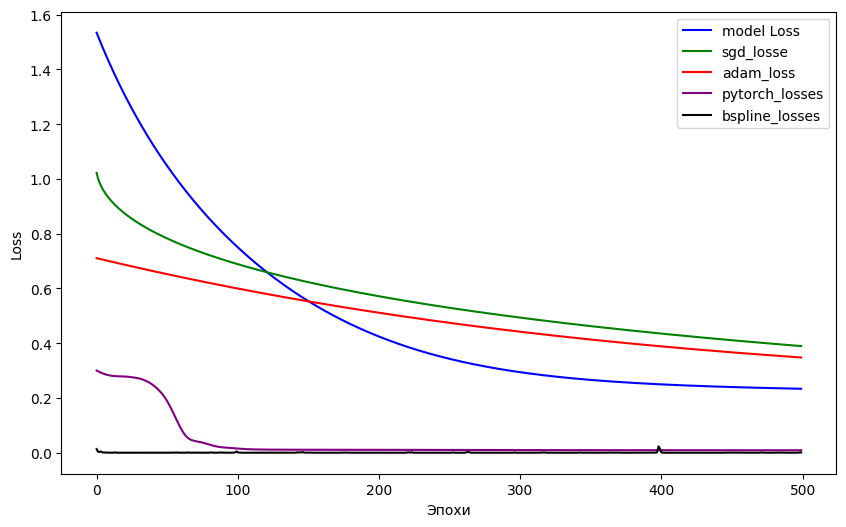

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(model_loss, label="model Loss", color='blue', linewidth=1.5)
plt.plot(adagrad_losses, label="sgd_losse", color='green',  linewidth=1.5)
plt.plot(adam_losses, label="adam_loss", color='red', linewidth=1.5)
plt.plot(pytorch_losses, label="pytorch_losses", color='purple', linewidth=1.5)
plt.plot(bspline_losses, label="bspline_losses", color='black', linewidth=1.5)


plt.xlabel("Эпохи")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()


PyTorch модель: Эта модель достигает наименьших значений функции потерь и демонстрирует быструю сходимость. В конце графика её потери практически стабилизируются около нуля, что указывает на эффективное обучение и хорошую сходимость.

SGD: Видно, что потери для этой модели остаются практически постоянными на начальном уровне и не снижаются. Это указывает на то, что либо выбранный шаг обучения слишком мал, либо оптимизатор не подходит для этой задачи.

Среди всех моделей и оптимизаторов, модель на PyTorch (фиолетовая линия) показывает наилучшие результаты по сходимости и достижению минимальных потерь. Остальные подходы (особенно Adam и SGD) либо не оптимизированы, либо требуют пересмотра гиперпараметров для улучшения их производительности.
Сеть Колмогорова–Арнольда демонстрирует устойчивое снижение функции потерь по эпохам, что указывает на наличие процесса обучения. Однако снижение происходит медленно, и функция потерь остается выше, чем у других моделей, особенно по сравнению с PyTorch-моделью. Это может означать, что сеть постепенно обучается, но медленно сходится к минимальному значению функции потерь.

# Новый код с кастомной ф-ией активации

Kan по сути каждому выходу сопоставляет уникальную ф-ию активацию с несколькими параметрами и обучает их.
Проблема в том что такое сложно обучать и дорого хранить, поэтому использовать Kan на высоких размерностях невыгодно.
Обычно для интерпретации значений между двумя точками используют сплайны, но мы воспользуемся линейной апроксимацией ибо лень (на этапе когда начинал писать код подумал про них, но забыл как называются поэтому написал линейной апроксимацией).
Хорошо расписанно [тут](https://habr.com/ru/articles/820891/).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
np.random.seed(42)

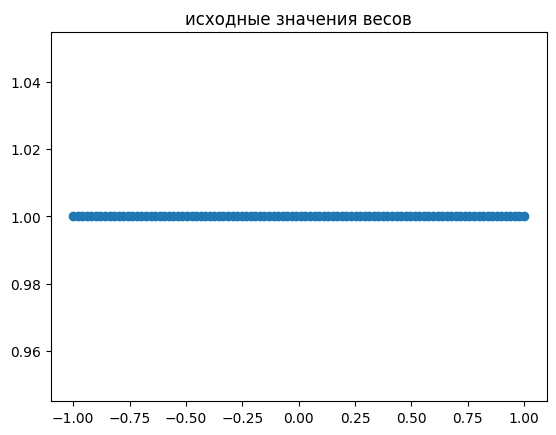

In [ ]:
innit_values = [1 for i in range(0, 100)]
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_values = scaler.fit_transform([[i] for i in range(0, 100)]).flatten().tolist()
plt.scatter(scaled_values, innit_values)
plt.title("исходные значения весов")
pass

In [ ]:
class CustomActivation(nn.Module):
    def __init__(self,
                 wights_x=scaled_values,
                 wights_innit_values=innit_values,
                 outer_wights=(1, 1),
                #  outer_bias=(0, 0),
                 ):
        super(CustomActivation, self).__init__()
        params = sorted(
            [(x, wight)
             for x, wight in zip(wights_x, wights_innit_values)],
            key=lambda x: x[0])
        self.params = nn.ParameterList([nn.Parameter(torch.tensor(wight, dtype=torch.float32)) for _, wight in params])
        self.params_loc = torch.tensor([x for x, _ in params])
        self.outer_wights = nn.ParameterList([nn.Parameter(torch.tensor(wight, dtype=torch.float32)) for wight in outer_wights])
        # self.outer_bias = [nn.Parameter(bais) for bais in outer_bias]

    @staticmethod
    def custom_func(params_loc, params, x, outer_weights):
        if not isinstance(x, torch.Tensor):
            raise TypeError("Input x must be a torch.Tensor")

        # Преобразуем params в удобные тензоры
        # params_tensor = torch.tensor(params)
        x_values = params_loc
        y_values = params

        # Определяем маски для значений x вне интервала params
        left_mask = x <= x_values[0]
        right_mask = x >= x_values[-1]

        # Рассчитываем значения для левой границы
        if left_mask.any():
            minx = x_values[0]
            near_y = y_values[0]
            left_values = outer_weights[0] * (minx - x[left_mask]) ** 2 + near_y / (1 + (minx - x[left_mask]) ** 4)
        else:
            left_values = torch.tensor([])

        # Рассчитываем значения для правой границы
        if right_mask.any():
            maxx = x_values[-1]
            near_y = y_values[-1]
            right_values = outer_weights[1] * (maxx - x[right_mask]) ** 2 + near_y / (1 + (maxx - x[right_mask]) ** 4)
        else:
            right_values = torch.tensor([])

        # Для значений внутри интервала используем линейную интерполяцию
        inner_mask = (~left_mask) & (~right_mask)
        inner_values = torch.zeros_like(x[inner_mask])

        if inner_mask.any():
            for i in range(len(x_values) - 1):
                x1, y1, x2, y2 = (x_values[i], y_values[i], x_values[i + 1], y_values[i + 1])
                interval_mask = (x[inner_mask] >= x1) & (x[inner_mask] <= x2)

                if interval_mask.any():
                    # print(x1, y1, x2, y2)
                    # print(y1 * (x[inner_mask][interval_mask] - x1) / (x2 - x1), y2 * (x2 - x[inner_mask][interval_mask]) / (x2 - x1))
                    interp_values = (
                        y1 * (1 - (x[inner_mask][interval_mask] - x1) / (x2 - x1)) +
                        y2 * (1 - (x2 - x[inner_mask][interval_mask]) / (x2 - x1))
                    )
                    inner_values[interval_mask] = interp_values

        # Объединяем все значения
        result = torch.zeros_like(x)
        result[left_mask] = left_values
        result[right_mask] = right_values
        result[inner_mask] = inner_values

        return result

    # def custom_func(params, x, outer_wights):
    #     # для значений вне заданных значений применяем линейню регресию,
    #     # с оговоркой что она сходиться с краями нашей кастомной ф-ии (в -1 и 1 для дефолтных значений)
    #     if x >= params[-1][0]:
    #         maxx = params[-1][0]
    #         near_y = params[-1][1]
    #         return outer_wights[1] * (maxx - x) ** 2 + near_y / (1 + (maxx - x) ** 4)
    #     if x <= params[0][0]:
    #         minx = params[0][0]
    #         near_y = params[0][1]
    #         return outer_wights[0] * (minx - x) ** 2 + near_y / (1 + (minx - x) ** 4)
    #     # для значений поподающих в интервал (-1, 1 для дефотных) возвращем линейную интерполяцию ближайших значений
    #     for i in range(len(params) - 1):
    #         curr_params = (params[i], params[i + 1])
    #         if x >= curr_params[0][0] and  x <= curr_params[1][0]:
    #             return curr_params[0][1] * (x - curr_params[0][0]) / (curr_params[1][0] - curr_params[0][0]) + \
    #                    curr_params[1][1] * (curr_params[1][0] - x) / (curr_params[1][0] - curr_params[0][0])
    #     print("Some shit code detected! Find man who code this and made him suffering!")
    #     return 0


    def forward(self, x):
        return self.__class__.custom_func(self.params_loc, self.params, x, self.outer_wights)

class Kan(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Kan, self).__init__()
        # self.fc1 = nn.Linear(input_size, output_size)
        # self.activation = nn.Sigmoid()
        # self.fc1 = nn.Linear(input_size, output_size)
        self.activationkan = CustomActivation()
        # self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x = self.fc1(x)
        # x = self.activation(x)
        x = self.activationkan(x)
        # x = self.fc1(x)
        # x = self.fc2(x)
        return x



Попробуем для начала обучить 1 ф-ию активации на простом синусе

In [ ]:
input_size = 2
hidden_size = 10
output_size = 1
pytorch_model = Kan(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.01)
pytorch_losses = []
n_epochs = 500
xtensor = torch.Tensor(MinMaxScaler().fit_transform(np.array([np.array([i / 10]) for i in range(0, 100)])))
ytensor = torch.Tensor(np.array([np.array([np.sin(i / 10)]) for i in range(0, 100)]))
for epoch in range(n_epochs):
    outputs = pytorch_model(xtensor)
    loss = criterion(outputs, ytensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Эпоха [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')
    pytorch_losses.append(loss.item())

print("Итоговая ошибка:", loss.item())

Эпоха [50/500], Loss: 0.5163
Эпоха [100/500], Loss: 0.2261
Эпоха [150/500], Loss: 0.0927
Эпоха [200/500], Loss: 0.0349
Эпоха [250/500], Loss: 0.0119
Эпоха [300/500], Loss: 0.0037
Эпоха [350/500], Loss: 0.0010
Эпоха [400/500], Loss: 0.0003
Эпоха [450/500], Loss: 0.0001
Эпоха [500/500], Loss: 0.0000
Итоговая ошибка: 1.4073544662096538e-05


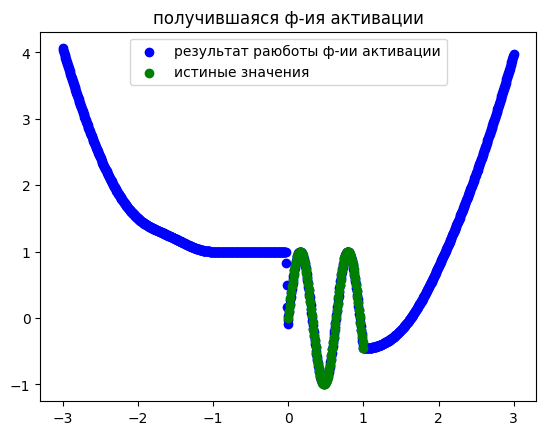

In [ ]:
activation_params = list(map(float, pytorch_model.activationkan.params))
activation_params_loc = list(map(float, pytorch_model.activationkan.params_loc))
activation_outer_wights = list(map(float, pytorch_model.activationkan.outer_wights))
func = lambda x: CustomActivation.custom_func(activation_params_loc, activation_params, torch.tensor(x, dtype=torch.float32), activation_outer_wights)
x = list(np.linspace(-3, 3, num=1000))
y = list(map(func, x))
# x_real = pytorch_model.activation(pytorch_model.fc1.forward(X_tensor)).tolist()
# x_real = pytorch_model.fc1.forward(X_tensor).tolist()
x_real = xtensor.tolist()
y_real = ytensor.tolist()
plt.scatter(x, y, color="b", label="результат раюботы ф-ии активации")
plt.scatter(x_real, y_real, color="g", label="истиные значения")
plt.legend()
plt.title("получившаяся ф-ия активации")
pass

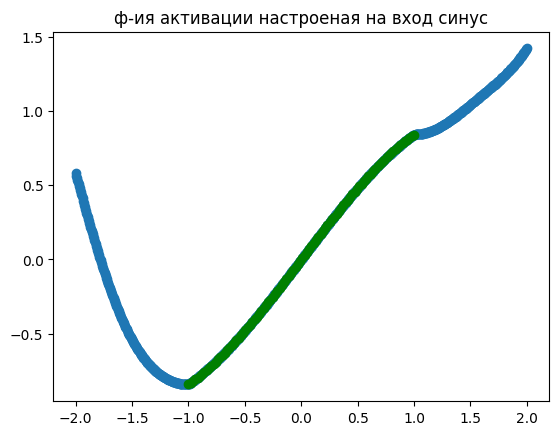

In [ ]:
# как это работает?
# мы например для синуса получаем такую ф-ию активации:
innit_values = [np.sin(i) for i in scaled_values]
params = list(zip(scaled_values, innit_values))
func = lambda x: CustomActivation.custom_func(scaled_values, innit_values, torch.tensor(x, dtype=torch.float32), (1, 1))
x = list(np.linspace(-2, 2, num=800))
y = list(map(func, x))
plt.scatter(x, y)
plt.scatter(scaled_values, innit_values, color="g", label="real values")
plt.title("ф-ия активации настроеная на вход синус")
pass

Теперь усложним задачу:

Передадим на вход 2 фичи и на выход 1

In [ ]:
n_samples = 1000
x1 = np.random.uniform(0, 1, n_samples)
x2 = np.random.uniform(0, 1, n_samples)
X = np.vstack([x1, x2]).T
y = np.sin(x1) + x2 * np.exp(x1 * x2) - x1**2
# y = np.sin(x1) + x2 * np.exp(x1 * x2) - 2**x1 + 7 * np.log(x1 ** x1)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

## попробовал поставить функцию активации перед функцией активации
(как бы странно это не звучало)

In [ ]:
class Kan(nn.Module):
    def __init__(self, input_size, output_size):
        super(Kan, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        # self.fc1 = nn.Linear(input_size, output_size)
        # self.activation = nn.Sigmoid()
        # self.activationkan = CustomActivation()
        self.kan_act = nn.ModuleList([CustomActivation() for _ in range(input_size)]) #Phi функции для переменных x и y
        self.fc1 = nn.Linear(input_size, output_size)
        self.activation = nn.Sigmoid()
        self.kan_act_end = nn.ModuleList([CustomActivation() for _ in range(output_size)])
        # self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Kan activation
        # print(x[:, 1])
        x_fetures = [x[:, i] for i in range(self.input_size)]
        new_x_list = []
        for i in range(self.input_size):
            new_x_list += [self.kan_act[i](x_fetures[i].view(-1, 1))]
        x = torch.cat(new_x_list, dim=1)
        # linear dense
        x = self.fc1(x)
        # scaler
        x = self.activation(x)
        # Kan activation
        x_fetures = [x[:, i] for i in range(self.output_size)]
        new_x_list = []
        for i in range(self.output_size):
            new_x_list += [self.kan_act_end[i](x_fetures[i].view(-1, 1))]
        out = torch.cat(new_x_list, dim=1)
        return out

input_size = 2
hidden_size = 10
output_size = 1
pytorch_model = Kan(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.01)
pytorch_losses = []
n_epochs = 500
xtensor = torch.Tensor(MinMaxScaler().fit_transform(np.array([np.array([i / 10]) for i in range(0, 100)])))
ytensor = torch.Tensor(np.array([np.array([np.sin(i / 10)]) for i in range(0, 100)]))
for epoch in range(n_epochs):
    outputs = pytorch_model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Эпоха [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')
    pytorch_losses.append(loss.item())

print("Итоговая ошибка:", loss.item())

Эпоха [50/500], Loss: 0.2791
Эпоха [100/500], Loss: 0.2791
Эпоха [150/500], Loss: 0.0527
Эпоха [200/500], Loss: 0.0202
Эпоха [250/500], Loss: 0.0120
Эпоха [300/500], Loss: 0.0089
Эпоха [350/500], Loss: 0.0078
Эпоха [400/500], Loss: 0.0074
Эпоха [450/500], Loss: 0.0077
Эпоха [500/500], Loss: 0.0066
Итоговая ошибка: 0.006622734945267439


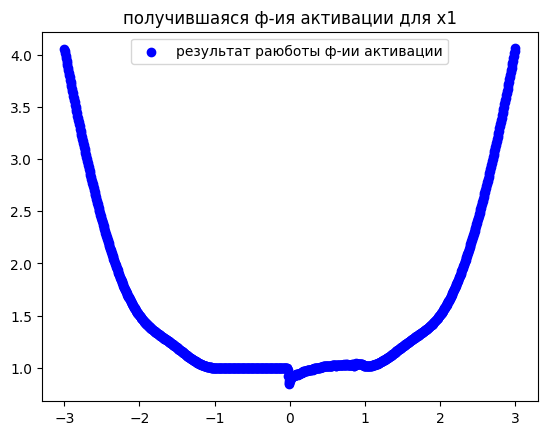

In [ ]:
activation_params = list(map(float, pytorch_model.kan_act[0].params))
activation_params_loc = list(map(float, pytorch_model.kan_act[0].params_loc))
activation_outer_wights = list(map(float, pytorch_model.kan_act[0].outer_wights))
func = lambda x: CustomActivation.custom_func(activation_params_loc, activation_params, torch.tensor(x, dtype=torch.float32), activation_outer_wights)
x = list(np.linspace(-3, 3, num=1000))
y = list(map(func, x))
# x_real = pytorch_model.activation(pytorch_model.fc1.forward(X_tensor)).tolist()
# x_real = pytorch_model.fc1.forward(X_tensor).tolist()
# x_real = xtensor.tolist()
# y_real = ytensor.tolist()
plt.scatter(x, y, color="b", label="результат раюботы ф-ии активации")
# plt.scatter(x_real, y_real, color="g", label="истиные значения")
plt.legend()
plt.title("получившаяся ф-ия активации для x1")
pass

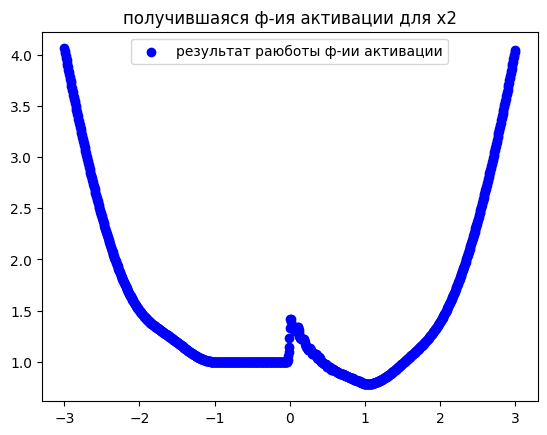

In [ ]:
activation_params = list(map(float, pytorch_model.kan_act[1].params))
activation_params_loc = list(map(float, pytorch_model.kan_act[1].params_loc))
activation_outer_wights = list(map(float, pytorch_model.kan_act[1].outer_wights))
func = lambda x: CustomActivation.custom_func(activation_params_loc, activation_params, torch.tensor(x, dtype=torch.float32), activation_outer_wights)
x = list(np.linspace(-3, 3, num=1000))
y = list(map(func, x))
# x_real = pytorch_model.activation(pytorch_model.fc1.forward(X_tensor)).tolist()
# x_real = pytorch_model.fc1.forward(X_tensor).tolist()
# x_real = xtensor.tolist()
# y_real = ytensor.tolist()
plt.scatter(x, y, color="b", label="результат раюботы ф-ии активации")
# plt.scatter(x_real, y_real, color="g", label="истиные значения")
plt.legend()
plt.title("получившаяся ф-ия активации для x2")
pass

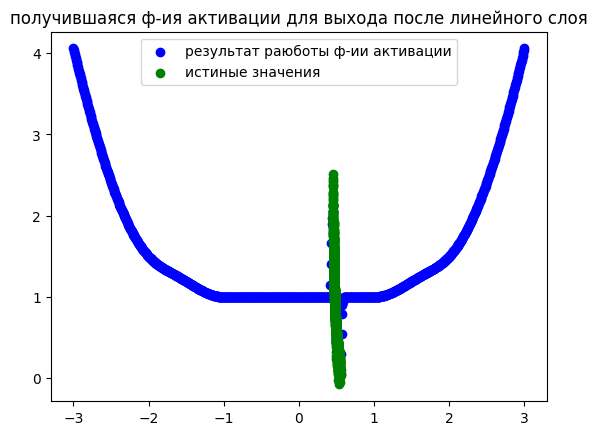

In [ ]:
activation_params = list(map(float, pytorch_model.kan_act_end[0].params))
activation_params_loc = list(map(float, pytorch_model.kan_act_end[0].params_loc))
activation_outer_wights = list(map(float, pytorch_model.kan_act_end[0].outer_wights))
func = lambda x: CustomActivation.custom_func(activation_params_loc, activation_params, torch.tensor(x, dtype=torch.float32), activation_outer_wights)
x = list(np.linspace(-3, 3, num=1000))
y = list(map(func, x))
# x_real = pytorch_model.activation(pytorch_model.fc1.forward(X_tensor)).tolist()
# x_real = pytorch_model.fc1.forward(X_tensor).tolist()
def part_of_forward(x):
    x_fetures = [x[:, i] for i in range(pytorch_model.input_size)]
    new_x_list = []
    for i in range(pytorch_model.input_size):
        new_x_list += [pytorch_model.kan_act[i](x_fetures[i].view(-1, 1))]
    x = torch.cat(new_x_list, dim=1)
    # linear dense
    x = pytorch_model.fc1(x)
    # scaler
    x = pytorch_model.activation(x)
    return x
x_real = part_of_forward(X_tensor).tolist()
y_real = y_tensor.tolist()
# x_real = xtensor.tolist()
# y_real = ytensor.tolist()
plt.scatter(x, y, color="b", label="результат раюботы ф-ии активации")
plt.scatter(x_real, y_real, color="g", label="истиные значения")
plt.legend()
plt.title("получившаяся ф-ия активации для выхода после линейного слоя")
pass

## без scaler-a

In [ ]:
class Kan(nn.Module):
    def __init__(self, input_size, output_size):
        super(Kan, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        # self.fc1 = nn.Linear(input_size, output_size)
        # self.activation = nn.Sigmoid()
        # self.activationkan = CustomActivation()
        self.kan_act = nn.ModuleList([CustomActivation() for _ in range(input_size)]) #Phi функции для переменных x и y
        self.fc1 = nn.Linear(input_size, output_size)
        self.kan_act_end = nn.ModuleList([CustomActivation() for _ in range(output_size)])
        # self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Kan activation
        # print(x[:, 1])
        x_fetures = [x[:, i] for i in range(self.input_size)]
        new_x_list = []
        for i in range(self.input_size):
            new_x_list += [self.kan_act[i](x_fetures[i].view(-1, 1))]
        x = torch.cat(new_x_list, dim=1)
        # linear dense
        x = self.fc1(x)
        # scaler
        # target_min = float(-1)
        # target_max = float(1)
        # min, _ = torch.min(x, dim=0)
        # max, _ = torch.max(x, dim=0)
        # X_std = (x - min) / (max - min)
        # x = X_std * (target_max - target_min) + target_min
        # Kan activation
        x_fetures = [x[:, i] for i in range(self.output_size)]
        new_x_list = []
        for i in range(self.output_size):
            new_x_list += [self.kan_act_end[i](x_fetures[i].view(-1, 1))]
        out = torch.cat(new_x_list, dim=1)
        return out

input_size = 2
hidden_size = 10
output_size = 1
pytorch_model = Kan(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.01)
pytorch_losses = []
n_epochs = 500
xtensor = torch.Tensor(MinMaxScaler().fit_transform(np.array([np.array([i / 10]) for i in range(0, 100)])))
ytensor = torch.Tensor(np.array([np.array([np.sin(i / 10)]) for i in range(0, 100)]))
for epoch in range(n_epochs):
    outputs = pytorch_model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Эпоха [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')
    pytorch_losses.append(loss.item())

print("Итоговая ошибка:", loss.item())

Эпоха [50/500], Loss: 0.1236
Эпоха [100/500], Loss: 0.0371
Эпоха [150/500], Loss: 0.0217
Эпоха [200/500], Loss: 0.0172
Эпоха [250/500], Loss: 0.0154
Эпоха [300/500], Loss: 0.0134
Эпоха [350/500], Loss: 0.0158
Эпоха [400/500], Loss: 0.0123
Эпоха [450/500], Loss: 0.0120
Эпоха [500/500], Loss: 0.0114
Итоговая ошибка: 0.011418848298490047


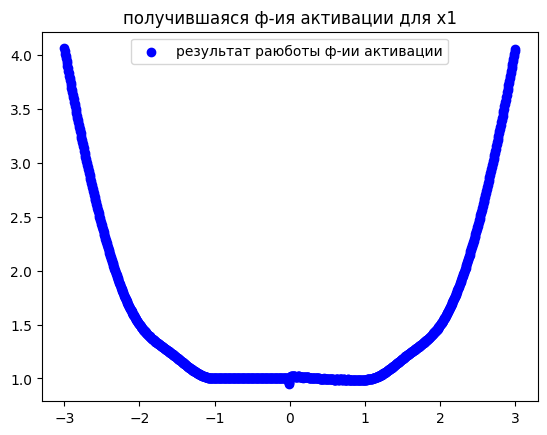

In [ ]:
activation_params = list(map(float, pytorch_model.kan_act[0].params))
activation_params_loc = list(map(float, pytorch_model.kan_act[0].params_loc))
activation_outer_wights = list(map(float, pytorch_model.kan_act[0].outer_wights))
func = lambda x: CustomActivation.custom_func(activation_params_loc, activation_params, torch.tensor(x, dtype=torch.float32), activation_outer_wights)
x = list(np.linspace(-3, 3, num=1000))
y = list(map(func, x))
# x_real = pytorch_model.activation(pytorch_model.fc1.forward(X_tensor)).tolist()
# x_real = pytorch_model.fc1.forward(X_tensor).tolist()
# x_real = xtensor.tolist()
# y_real = ytensor.tolist()
plt.scatter(x, y, color="b", label="результат раюботы ф-ии активации")
# plt.scatter(x_real, y_real, color="g", label="истиные значения")
plt.legend()
plt.title("получившаяся ф-ия активации для x1")
pass

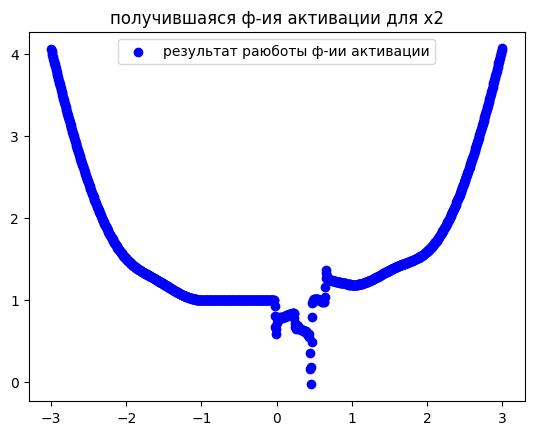

In [ ]:
activation_params = list(map(float, pytorch_model.kan_act[1].params))
activation_params_loc = list(map(float, pytorch_model.kan_act[1].params_loc))
activation_outer_wights = list(map(float, pytorch_model.kan_act[1].outer_wights))
func = lambda x: CustomActivation.custom_func(activation_params_loc, activation_params, torch.tensor(x, dtype=torch.float32), activation_outer_wights)
x = list(np.linspace(-3, 3, num=1000))
y = list(map(func, x))
# x_real = pytorch_model.activation(pytorch_model.fc1.forward(X_tensor)).tolist()
# x_real = pytorch_model.fc1.forward(X_tensor).tolist()
# x_real = xtensor.tolist()
# y_real = ytensor.tolist()
plt.scatter(x, y, color="b", label="результат раюботы ф-ии активации")
# plt.scatter(x_real, y_real, color="g", label="истиные значения")
plt.legend()
plt.title("получившаяся ф-ия активации для x2")
pass

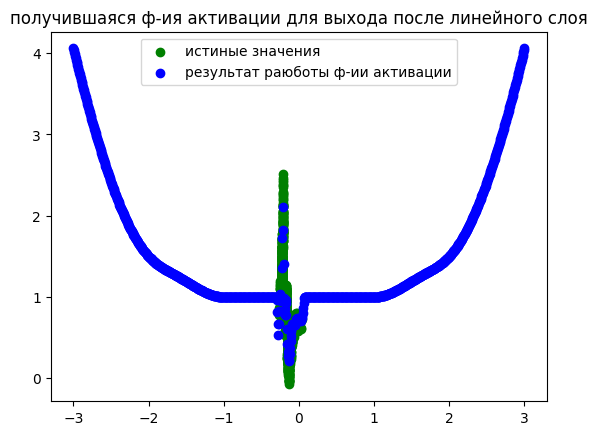

In [ ]:
activation_params = list(map(float, pytorch_model.kan_act_end[0].params))
activation_params_loc = list(map(float, pytorch_model.kan_act_end[0].params_loc))
activation_outer_wights = list(map(float, pytorch_model.kan_act_end[0].outer_wights))
func = lambda x: CustomActivation.custom_func(activation_params_loc, activation_params, torch.tensor(x, dtype=torch.float32), activation_outer_wights)
x = list(np.linspace(-3, 3, num=1000))
y = list(map(func, x))
# x_real = pytorch_model.activation(pytorch_model.fc1.forward(X_tensor)).tolist()
# x_real = pytorch_model.fc1.forward(X_tensor).tolist()

def part_of_forward(x):
    x_fetures = [x[:, i] for i in range(pytorch_model.input_size)]
    new_x_list = []
    for i in range(pytorch_model.input_size):
        new_x_list += [pytorch_model.kan_act[i](x_fetures[i].view(-1, 1))]
    x = torch.cat(new_x_list, dim=1)
    # linear dense
    x = pytorch_model.fc1(x)
    return x
x_real = part_of_forward(X_tensor).tolist()
y_real = y_tensor.tolist()
plt.scatter(x_real, y_real, color="g", label="истиные значения")

# x_real = xtensor.tolist()
# y_real = ytensor.tolist()
plt.scatter(x, y, color="b", label="результат раюботы ф-ии активации")
plt.legend()
plt.title("получившаяся ф-ия активации для выхода после линейного слоя")
pass

## меньше весов

Поэкперементируем с уменьшением кол-ва точек до 8

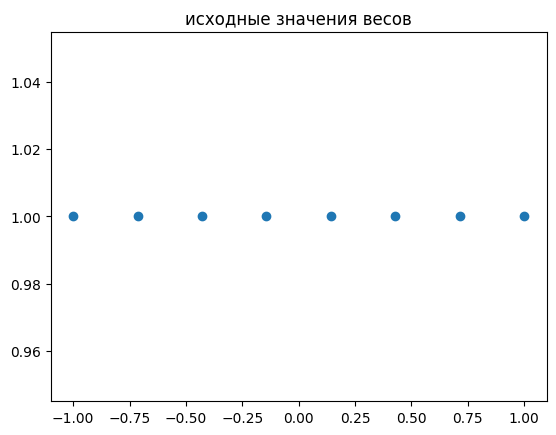

In [ ]:
innit_values = [1 for i in range(0, 8)]
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_values = scaler.fit_transform([[i] for i in range(0, 8)]).flatten().tolist()
plt.scatter(scaled_values, innit_values)
plt.title("исходные значения весов")
pass

In [ ]:
class Kan(nn.Module):
    def __init__(self, input_size, output_size):
        super(Kan, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        # self.fc1 = nn.Linear(input_size, output_size)
        # self.activation = nn.Sigmoid()
        # self.activationkan = CustomActivation()
        self.kan_act = nn.ModuleList([CustomActivation(
                 wights_x=scaled_values,
                 wights_innit_values=innit_values,
                 ) for _ in range(input_size)]) #Phi функции для переменных x и y
        self.fc1 = nn.Linear(input_size, output_size)
        self.kan_act_end = nn.ModuleList([CustomActivation(
                 wights_x=scaled_values,
                 wights_innit_values=innit_values,
                 ) for _ in range(output_size)])
        # self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Kan activation
        # print(x[:, 1])
        x_fetures = [x[:, i] for i in range(self.input_size)]
        new_x_list = []
        for i in range(self.input_size):
            new_x_list += [self.kan_act[i](x_fetures[i].view(-1, 1))]
        x = torch.cat(new_x_list, dim=1)
        # linear dense
        x = self.fc1(x)
        # scaler
        # убрал MinMaxScaler тк там что то странное происходит, будто autograd работает неправильно
        # target_min = float(-1)
        # target_max = float(1)
        # min, _ = torch.min(x, dim=0)
        # max, _ = torch.max(x, dim=0)
        # X_std = (x - min) / (max - min)
        # x = X_std * (target_max - target_min) + target_min
        # Kan activation
        x_fetures = [x[:, i] for i in range(self.output_size)]
        new_x_list = []
        for i in range(self.output_size):
            new_x_list += [self.kan_act_end[i](x_fetures[i].view(-1, 1))]
        out = torch.cat(new_x_list, dim=1)
        # out = x
        return out

input_size = 2
hidden_size = 10
output_size = 1
pytorch_model = Kan(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.01)
pytorch_losses = []
n_epochs = 500
xtensor = torch.Tensor(MinMaxScaler().fit_transform(np.array([np.array([i / 10]) for i in range(0, 100)])))
ytensor = torch.Tensor(np.array([np.array([np.sin(i / 10)]) for i in range(0, 100)]))
for epoch in range(n_epochs):
    outputs = pytorch_model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Эпоха [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')
    pytorch_losses.append(loss.item())

print("Итоговая ошибка:", loss.item())

Эпоха [50/500], Loss: 0.1376
Эпоха [100/500], Loss: 0.0258
Эпоха [150/500], Loss: 0.0176
Эпоха [200/500], Loss: 0.0164
Эпоха [250/500], Loss: 0.0160
Эпоха [300/500], Loss: 0.0156
Эпоха [350/500], Loss: 0.0151
Эпоха [400/500], Loss: 0.0145
Эпоха [450/500], Loss: 0.0137
Эпоха [500/500], Loss: 0.0131
Итоговая ошибка: 0.013077758252620697


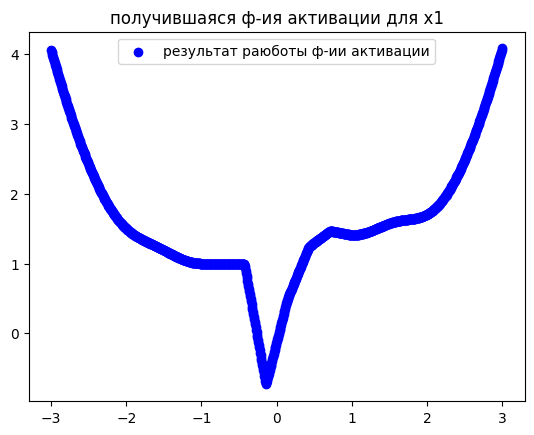

In [ ]:
activation_params = list(map(float, pytorch_model.kan_act[0].params))
activation_params_loc = list(map(float, pytorch_model.kan_act[0].params_loc))
activation_outer_wights = list(map(float, pytorch_model.kan_act[0].outer_wights))
func = lambda x: CustomActivation.custom_func(activation_params_loc, activation_params, torch.tensor(x, dtype=torch.float32), activation_outer_wights)
x = list(np.linspace(-3, 3, num=1000))
y = list(map(func, x))
# x_real = pytorch_model.activation(pytorch_model.fc1.forward(X_tensor)).tolist()
# x_real = pytorch_model.fc1.forward(X_tensor).tolist()
# x_real = xtensor.tolist()
# y_real = ytensor.tolist()
plt.scatter(x, y, color="b", label="результат раюботы ф-ии активации")
# plt.scatter(x_real, y_real, color="g", label="истиные значения")
plt.legend()
plt.title("получившаяся ф-ия активации для x1")
pass

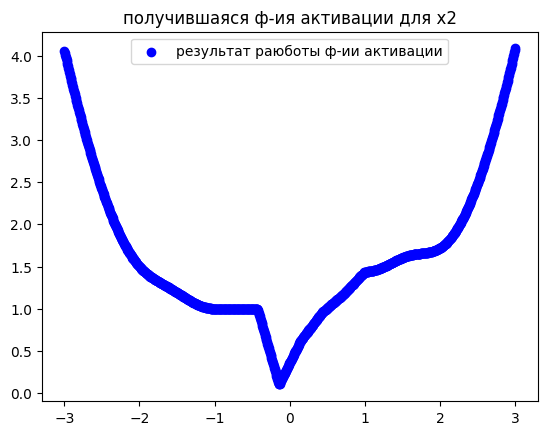

In [ ]:
activation_params = list(map(float, pytorch_model.kan_act[1].params))
activation_params_loc = list(map(float, pytorch_model.kan_act[1].params_loc))
activation_outer_wights = list(map(float, pytorch_model.kan_act[1].outer_wights))
func = lambda x: CustomActivation.custom_func(activation_params_loc, activation_params, torch.tensor(x, dtype=torch.float32), activation_outer_wights)
x = list(np.linspace(-3, 3, num=1000))
y = list(map(func, x))
# x_real = pytorch_model.activation(pytorch_model.fc1.forward(X_tensor)).tolist()
# x_real = pytorch_model.fc1.forward(X_tensor).tolist()
# x_real = xtensor.tolist()
# y_real = ytensor.tolist()
plt.scatter(x, y, color="b", label="результат раюботы ф-ии активации")
# plt.scatter(x_real, y_real, color="g", label="истиные значения")
plt.legend()
plt.title("получившаяся ф-ия активации для x2")
pass

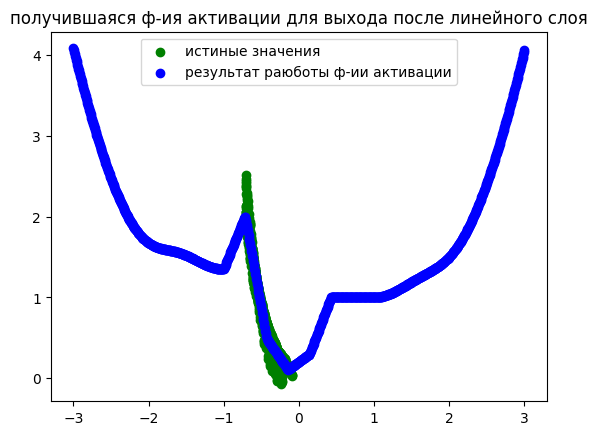

In [ ]:
activation_params = list(map(float, pytorch_model.kan_act_end[0].params))
activation_params_loc = list(map(float, pytorch_model.kan_act_end[0].params_loc))
activation_outer_wights = list(map(float, pytorch_model.kan_act_end[0].outer_wights))
func = lambda x: CustomActivation.custom_func(activation_params_loc, activation_params, torch.tensor(x, dtype=torch.float32), activation_outer_wights)
x = list(np.linspace(-3, 3, num=1000))
y = list(map(func, x))
# x_real = pytorch_model.activation(pytorch_model.fc1.forward(X_tensor)).tolist()
# x_real = pytorch_model.fc1.forward(X_tensor).tolist()

def part_of_forward(x):
    x_fetures = [x[:, i] for i in range(pytorch_model.input_size)]
    new_x_list = []
    for i in range(pytorch_model.input_size):
        new_x_list += [pytorch_model.kan_act[i](x_fetures[i].view(-1, 1))]
    x = torch.cat(new_x_list, dim=1)
    # linear dense
    x = pytorch_model.fc1(x)
    return x
x_real = part_of_forward(X_tensor).tolist()
y_real = y_tensor.tolist()
plt.scatter(x_real, y_real, color="g", label="истиные значения")

# x_real = xtensor.tolist()
# y_real = ytensor.tolist()
plt.scatter(x, y, color="b", label="результат раюботы ф-ии активации")
plt.legend()
plt.title("получившаяся ф-ия активации для выхода после линейного слоя")
pass

# Вывод

Нейроные сети Калмогорова-Арнольда дают неплохой результат на различных фуникция для задач интерполяции. Для задач Экстраполяции они могут дать не очень хороший результат. Так же видна проблема большого количества весов (но с ней еще можно побороться сокарщая кол-во весов со временем обучения). А еще видна проблема сложных расчетов (и вот эту проблему для KAN уже не получиться решить, это и есть основная проблема почему ей редко пользуются).